# Paso 1: Preparacion del Entorno

Instalacion de Librerias

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Paso 2: Cargar el DataSet



In [202]:
dataset = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

import warnings
warnings.filterwarnings('ignore')

## Comienza el Analisis Exploratorio de Datos

# Paso 3: Exploracion Inicial

In [203]:
dataset.info()
dataset.drop_duplicates(keep=False, inplace=True)
dataset.dropna(how='any', inplace=True)
dataset.shape
dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
685,26,No,Travel_Frequently,1283,Sales,1,3,Medical,1,956,...,2,80,0,7,2,3,7,7,0,7
1211,37,No,Travel_Frequently,1278,Sales,1,4,Medical,1,1700,...,3,80,2,6,2,2,6,3,1,3
84,34,No,Travel_Rarely,1153,Research & Development,1,2,Medical,1,110,...,3,80,0,5,2,3,5,2,1,3
1233,30,No,Travel_Rarely,793,Research & Development,16,1,Life Sciences,1,1729,...,2,80,1,10,2,2,10,0,0,8
462,34,No,Travel_Rarely,258,Sales,21,4,Life Sciences,1,621,...,4,80,0,10,3,3,10,7,5,7


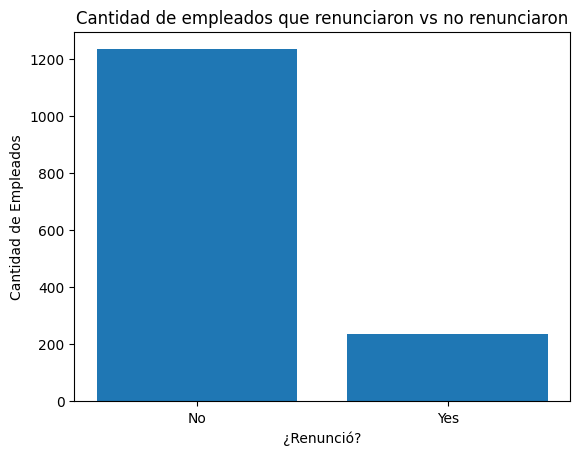

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [204]:
class_counts = dataset['Attrition'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("¿Renunció?")
plt.ylabel("Cantidad de Empleados")
plt.title("Cantidad de empleados que renunciaron vs no renunciaron")
plt.show()
print(class_counts)

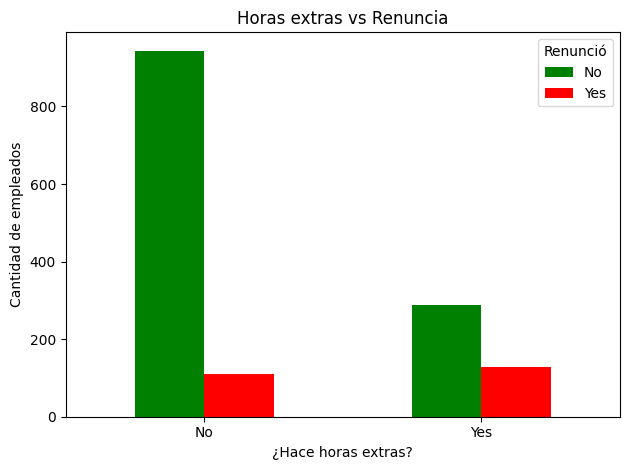

In [205]:
grouped = dataset.groupby(['OverTime', 'Attrition']).size().unstack()

grouped.plot(kind='bar', color=['green', 'red'])
plt.xlabel("¿Hace horas extras?")
plt.ylabel("Cantidad de empleados")
plt.title("Horas extras vs Renuncia")
plt.legend(title='Renunció')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

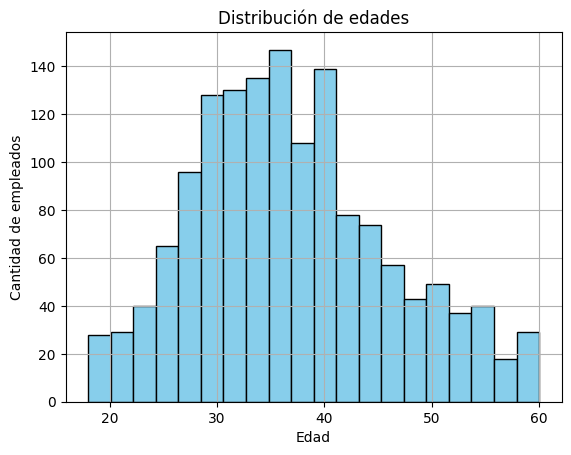

In [206]:
plt.hist(dataset['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de empleados')
plt.title('Distribución de edades')
plt.grid(True)
plt.show()

In [207]:
media = np.mean(dataset['Age'])
print(f"La edad promedio de los empleados es: {media:.2f} años") #No se que se podria agregar aca

La edad promedio de los empleados es: 36.92 años


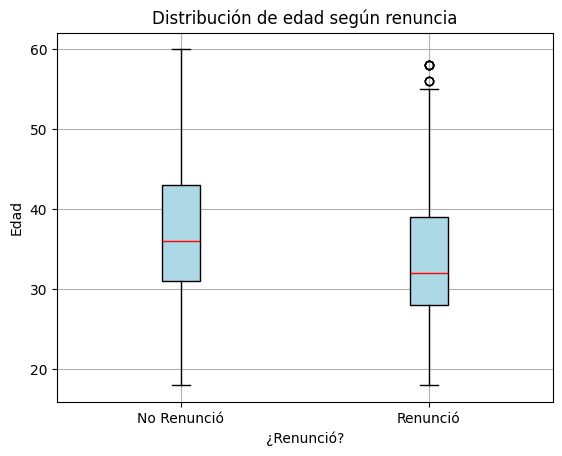

In [208]:
edades_renuncio = dataset[dataset['Attrition'] == "Yes"]['Age']
edades_no_renuncio = dataset[dataset['Attrition'] == "No"]['Age']

plt.boxplot([edades_no_renuncio, edades_renuncio],
            labels=['No Renunció', 'Renunció'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.xlabel("¿Renunció?")
plt.ylabel("Edad")
plt.title("Distribución de edad según renuncia")
plt.grid(True)
plt.show()

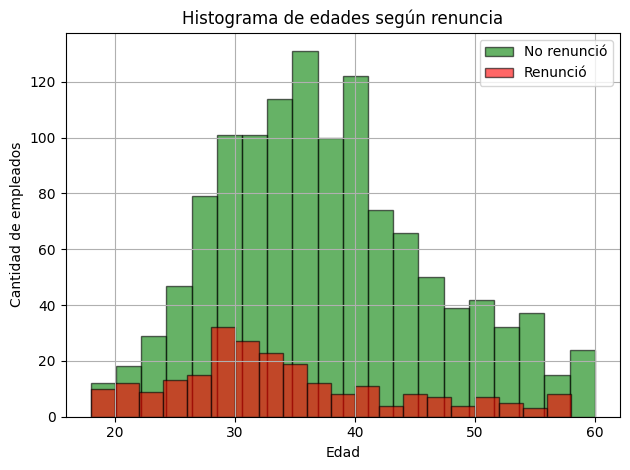

In [209]:
edades_renuncio = dataset[dataset['Attrition'] == "Yes"]['Age']
edades_no_renuncio = dataset[dataset['Attrition'] == "No"]['Age']

plt.hist(edades_no_renuncio, bins=20, alpha=0.6, label='No renunció', color='green', edgecolor='black')
plt.hist(edades_renuncio, bins=20, alpha=0.6, label='Renunció', color='red', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Cantidad de empleados')
plt.title('Histograma de edades según renuncia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [210]:
media = np.mean(dataset['MonthlyIncome'])
print(f"El sueldo promedio de los empleados es: {media:.2f} U$S")

El sueldo promedio de los empleados es: 6502.93 U$S


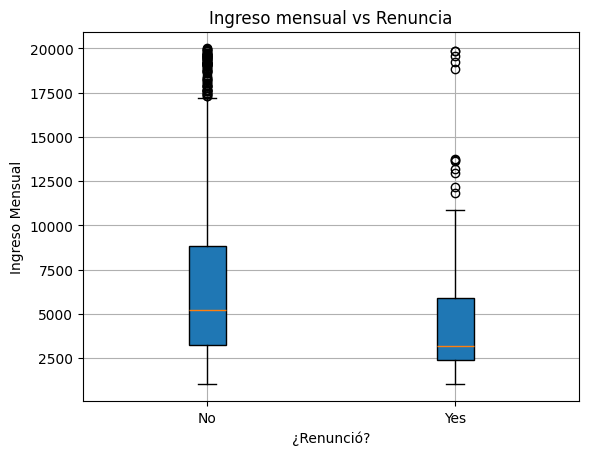

In [211]:
yes = dataset[dataset['Attrition'] == 'Yes']['MonthlyIncome']
no = dataset[dataset['Attrition'] == 'No']['MonthlyIncome']

plt.boxplot([no, yes], labels=['No', 'Yes'], patch_artist=True)
plt.xlabel('¿Renunció?')
plt.ylabel('Ingreso Mensual')
plt.title('Ingreso mensual vs Renuncia')
plt.grid(True)
plt.show()

In [212]:
mean_yes = dataset[dataset['Attrition'] == "Yes"]['MonthlyIncome'].mean()
mean_no = dataset[dataset['Attrition'] == "No"]['MonthlyIncome'].mean()

print(f"Sueldo promedio de quienes renunciaron: {mean_yes:.2f} U$S")
print(f"Sueldo promedio de quienes NO renunciaron: {mean_no:.2f} U$S")

Sueldo promedio de quienes renunciaron: 4787.09 U$S
Sueldo promedio de quienes NO renunciaron: 6832.74 U$S


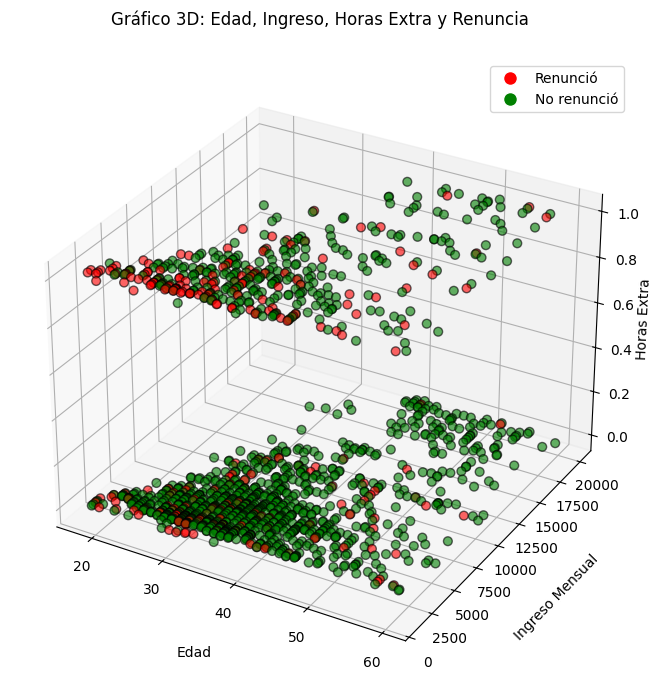

In [213]:
from mpl_toolkits.mplot3d import Axes3D

dataset['OverTime_num'] = dataset['OverTime'].map({'Yes': 1, 'No': 0})

x = dataset['Age']
y = dataset['MonthlyIncome']
z = dataset['OverTime_num']

colors = dataset['Attrition'].map({'Yes': 'red', 'No': 'green'})

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=colors, alpha=0.6, s=40, edgecolors='k')

ax.set_xlabel('Edad', labelpad=15)
ax.set_ylabel('Ingreso Mensual', labelpad=15)
ax.set_zlabel('Horas Extra', labelpad=0.2)
ax.set_title('Gráfico 3D: Edad, Ingreso, Horas Extra y Renuncia', pad=25)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Renunció', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No renunció', markerfacecolor='green', markersize=10),
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

# Modelado y Evaluacion

Eliminacion de columnas que no aportan valor

In [214]:
#EmployeeCount y StandardHours tienen el mismo valor para todos
#Over18, todos los valores son 'Y'
#EmployeeNumber es un identificador único para cada empleado
dataset = dataset.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})

cat_cols = dataset.select_dtypes(include='object').columns
dataset_encoded = pd.get_dummies(dataset, columns=cat_cols, drop_first=True)

y = dataset_encoded['Attrition']
X = dataset_encoded.drop('Attrition', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dividir los datos en conjuntos de entrenamiento y prueba

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

 Entrenamiento del modelo de Regresión Logística

In [216]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Evaluacion del Modelo

In [217]:
y_pred = model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[191  56]
 [ 18  29]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       247
           1       0.34      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.77       294



Entrenamiento de Otro Modelo

In [218]:
from xgboost import XGBClassifier

peso = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = XGBClassifier(scale_pos_weight=peso, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[236  11]
 [ 28  19]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.63      0.40      0.49        47

    accuracy                           0.87       294
   macro avg       0.76      0.68      0.71       294
weighted avg       0.85      0.87      0.85       294

